# Словарь

*Хеджирование* - страхование себя от убытков разными способами

*Волатильность* - разброс значений / непредсказуемость

*Call-опцион* - договор, который дает право покупателю опциона купить в будущем оговоренное количество ценных бумаг по установленной в контракте цене в течение ограниченного срока или отказаться от такой покупки (не налагает обязательства покупки)

*Put-опцион* - то же, но на продажу

*Страйк* - оговоренная цена

*Short position* - продаем (то, чего у нас нет, но не обязательно)

*Long position* - покупать, чтобы продать дороже

*Время работы биржи*: 9.30-16:00

*Premium* - цена опциона

*Exercise a right* - использовать право, купленное опционом

*(OTM) out-of-money option* - при текущей цене акций бесполезный

*ITM (in the money) option* - call со страйком ниже текущей цены или put со страйком выше

*ATM (at the money) option* - страйк равен текцщей цене

# Опционные алгоритмы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Covered call**

Имеем (или покупаем) акции, продаем call-option на эти акции.
Если бы только продали опцион: 
`payoff_short_call = [min(premium, -(i - strike-premium)) for i in price]`
Если бы только имели акции: 
`payoff_long_stock = [i-strike for i in price]`
А в нашем случае получаем сумму.

**Когда:** есть акции, которые нужно продать без лишних рисков, но и без сильной прибыли

Populating the interactive namespace from numpy and matplotlib


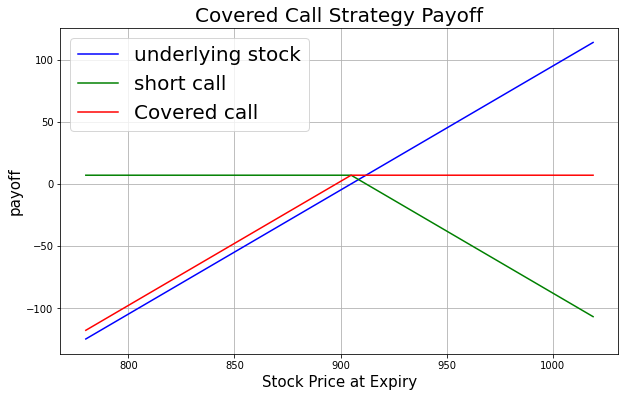

In [ ]:
%pylab inline
price = np.arange(780,1020,1) # the stock price at expiration date
strike = 905 # the strike price
premium = 7 # the option premium
# the payoff of short call position
payoff_short_call = [min(premium, -(i - strike-premium)) for i in price]
# the payoff of long stock postion
payoff_long_stock = [i-strike for i in price]
# the payoff of covered call
payoff_covered_call = np.sum([payoff_short_call, payoff_long_stock], axis=0)
plt.figure(figsize=(10,6))
plt.plot(price, payoff_long_stock, label = 'underlying stock', color='b')
plt.plot(price, payoff_short_call, label = 'short call', color='g')
plt.plot(price, payoff_covered_call, label = 'Covered call', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Covered Call Strategy Payoff',fontsize = 20)
plt.grid(True)
plt.show()

### **Bull Call Spread**

Пусть сейчас цена 900. Покупаем call-option со страйком 875 и продаем call-option со страйком 925. 
Покупаем ITM call и продаем OTM call.
Если бы только купили: `payoff_long_call = [max(-premium_low, i-k_low-premium_low ) for i in price]`
Если бы только продали: `payoff_short_call = [min(premium_high, -(i-k_high-premium_high)) for i in price]`
А в нашем случае получаем сумму

**Когда:** ожидаем повышение цены. За уменьшение premium платим ограничением профита.


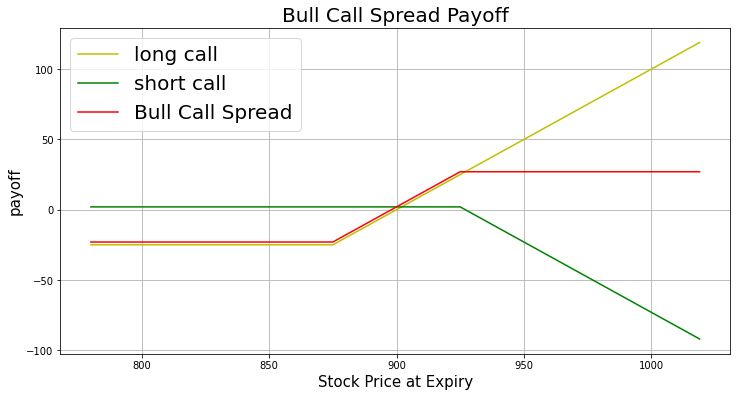

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
k_low = 875 # lower strike price for call
k_high = 925 # higher strike price for call
premium_low = 25 # premium of call option with lower strike
premium_high = 2 # premium of call option with higher strike
# long call with lower strike
payoff_long_call = [max(-premium_low, i-k_low-premium_low ) for i in price]
# short call with higher strike
payoff_short_call = [min(premium_high, -(i-k_high-premium_high)) for i in price]
payoff_bull_call = np.sum([payoff_long_call, payoff_short_call], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_call, label = 'long call', color='y')
plt.plot(price, payoff_short_call, label = 'short call', color='g')
plt.plot(price, payoff_bull_call, label = 'Bull Call Spread', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Bull Call Spread Payoff',fontsize = 20)
plt.grid(True)

### **Bear put spread**

Пусть сейчас цена 900. Покупаем put-option со страйком 825 и продаем put-option со страйком 975. 
Покупаем ITM put и продаем OTM put.
За уменьшение premium платим ограничением профита.

**Когда:** ожидаем понижение цены


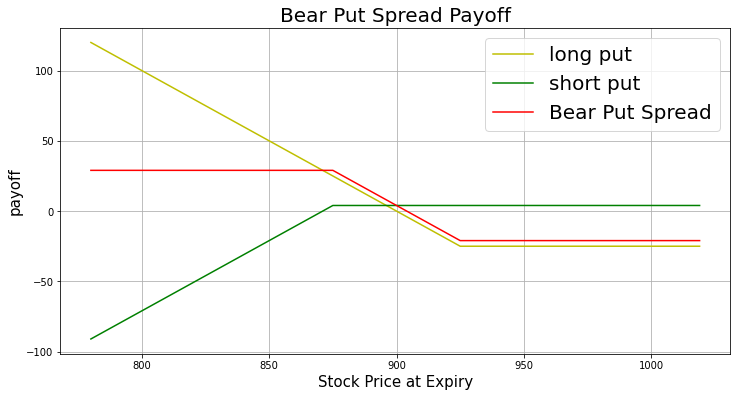

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
k_low = 875 # lower strike price for put
k_high = 925 # higher strike price for put
premium_low = 4 # premium of put option with lower strike
premium_high = 25 # premium of put option with higher strike
# long call with lower strike
payoff_long_put = [max(-premium_high, -(i-k_high+premium_high)) for i in price]
# short call with higher strike
payoff_short_put = [min(premium_low, i-k_low+premium_low) for i in price]
payoff_bear_put = np.sum([payoff_long_put, payoff_short_put], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_put, label = 'long put', color='y')
plt.plot(price, payoff_short_put, label = 'short put', color='g')
plt.plot(price, payoff_bear_put, label = 'Bear Put Spread', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Bear Put Spread Payoff',fontsize = 20)
plt.grid(True)

### **Long Straddle**

Покупаем call- и put- опционы с одинаковыми страйками, длительностью. 
Если бы только call: `payoff_long_call = [max(-premium_call, i-strike-premium_call) for i in price]`
Если бы только put: `payoff_long_put = [max(-premium_put, strike-i-premium_put) for i in price]`
А в нашем случае сумма

**Когда:** ожидается сильная волатильность рынка.

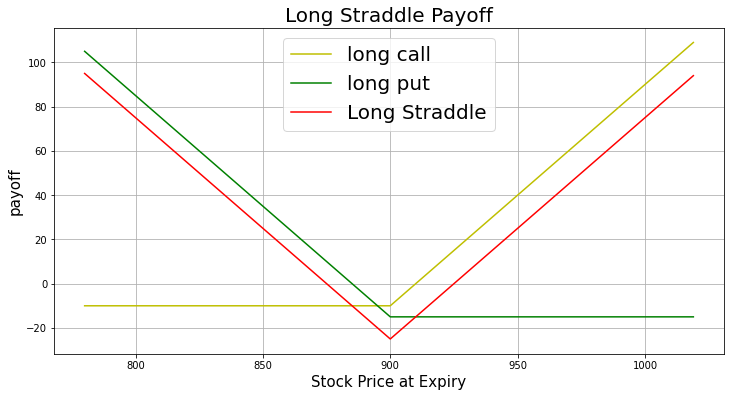

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
strike = 900 # strike price for both call and put
premium_call = 10 # premium of call option
premium_put = 15 # premium of put option
# payoff for the long call
payoff_long_call = [max(-premium_call, i-strike-premium_call) for i in price]
# payoff for the long put
payoff_long_put = [max(-premium_put, strike-i-premium_put) for i in price]
payoff_long_straddle = np.sum([payoff_long_call, payoff_long_put], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_call, label = 'long call', color='y')
plt.plot(price, payoff_long_put, label = 'long put', color='g')
plt.plot(price, payoff_long_straddle, label = 'Long Straddle', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Long Straddle Payoff',fontsize = 20)
plt.grid(True)

### **Long strangle**

То же, но берем оба опциона out-of-money. Например, если ожидается рост цен, то нам нужна не такая сильная подстраховка со стороны put-option и мы можем купить более дешевый с более низким страйком.

**Когда:** рассчитываем на сильную волатильность и больше ставим на движение в определенную сторону.


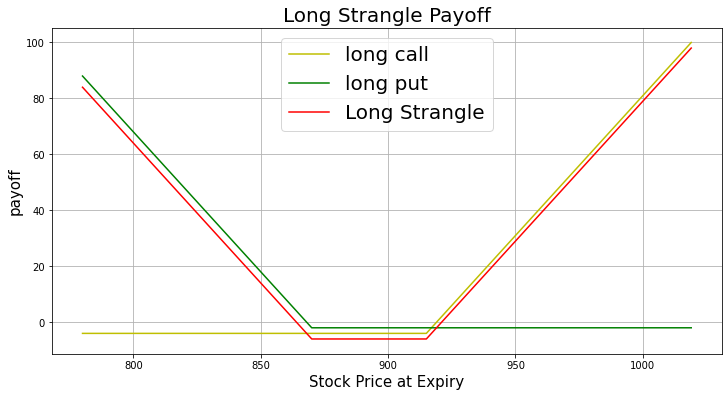

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
# Suppose the undelying price at time 0 is 830
k_call = 915 # The strike price of OTM call
k_put = 870 # The strike price of OTM put
premium_call = 4 # premium of call option
premium_put = 2 # premium of put option
# payoff for the long call
payoff_long_call = [max(-premium_call, i-k_call-premium_call) for i in price]
# payoff for the long put
payoff_long_put = [max(-premium_put, k_put-i-premium_put) for i in price]
payoff_long_strangle = np.sum([payoff_long_call, payoff_long_put], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_call, label = 'long call', color='y')
plt.plot(price, payoff_long_put, label = 'long put', color='g')
plt.plot(price, payoff_long_strangle, label = 'Long Strangle', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Long Strangle Payoff',fontsize = 20)
plt.grid(True)

### **Butterfly spread**

4 опциона одной длительности с разными страйками.
И профит, и лосс ограничены

Long butterfly spread with calls - Buy 1 ITM call, sell 2 ATM call, buy 1 OTM call

Long butterfly spread with puts - Buy 1 ITM put, sell 2 ATM put, buy 1 OTM put

Short butterfly spread with calls - Sell 1 ITM call, buy 2 ATM call, sell 1 OTM call

Short butterfly spread with puts - Buy 1 ITM put, sell 2 ATM put, buy 1 OTM put

**Когда:** ожидаем незначительное изменение рынка в любую сторону.


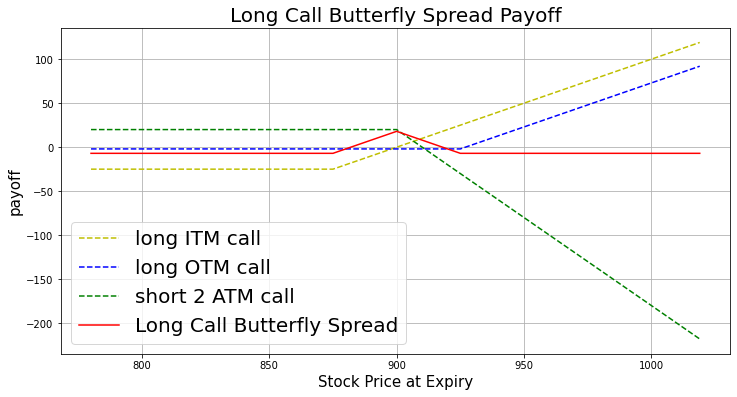

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
# Suppose the undelying price at time 0 is 935
k_itm = 875 # the strike price of ITM call
k_otm = 925 # the strike price of OTM call
k_atm = 900 # the strike price of ATM call
premium_itm = 25 # the premium of ITM call
premium_otm = 2 # the premium of OTM call
premium_atm = 10 # the premium of ATM call
# payoff for the long ITM call position
payoff_itm_long = [max(-premium_itm, i-k_itm-premium_itm) for i in price]
# payoff for the long OTM call position
payoff_otm_long = [max(-premium_otm, i-k_otm-premium_otm) for i in price]
# payoff for the 2 short ATM call position
payoff_atm_short = [min(2*premium_atm, -2*(i-k_atm-premium_atm)) for i in price]
# payoff for Butterfly Spread Strategy
payoff_butterfly_spread = np.sum([payoff_itm_long,payoff_otm_long,payoff_atm_short], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_itm_long, label = 'long ITM call', linestyle='--', color='y')
plt.plot(price, payoff_otm_long, label = 'long OTM call', linestyle='--', color='b')
plt.plot(price, payoff_atm_short, label = 'short 2 ATM call', linestyle='--', color='g')
plt.plot(price, payoff_butterfly_spread, label = 'Long Call Butterfly Spread', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Long Call Butterfly Spread Payoff',fontsize = 20)
plt.grid(True)

### **Iron condor**

Покупаем OTM put, продаем OTM put, продаем OTM call, покупаем OTM call со страйками в таком порядке. И профит (за счет premiums), и лосс ограничены

**Когда:** ожидаем незначительное изменение рынка в любую сторону.


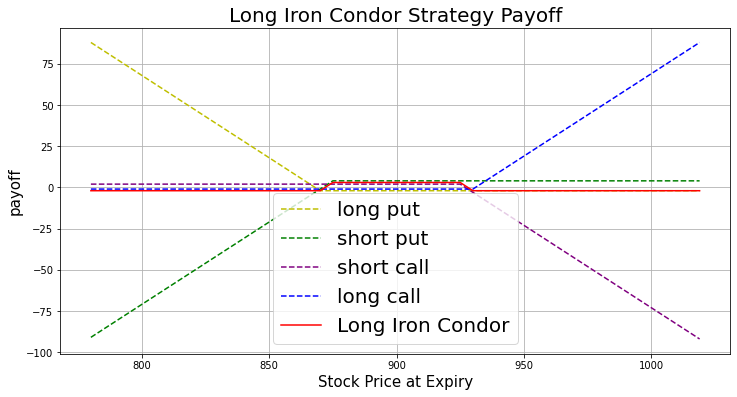

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
k_call_higher = 930 # the strike price of OTM call(Higher k)
k_call_lower = 925 # the strike price of OTM call(Lower k)
k_put_higher = 875 # the strike price of OTM put(Higher k)
k_put_lower = 870 # the strike price of OTM put(Lower k)
premium_call_higher = 1 # the premium of OTM call(Higher k)
premium_call_lower = 2 # the premium of OTM call(Lower k)
premium_put_higher = 4 # the premium of oTM put(Higher k)
premium_put_lower = 2   # the premium of OTM put(Lower k)
# payoff for the long put position
payoff_long_put = [max(-premium_put_lower, k_put_lower-i-premium_put_lower) for i in price]
# payoff for the short put position
payoff_short_put = [min(premium_put_higher, -(k_put_higher-i-premium_put_higher)) for i in price]
# payoff for the short call position
payoff_short_call = [min(premium_call_lower, -(i-k_call_lower-premium_call_lower)) for i in price]
# payoff for the long call position
payoff_long_call = [max(-premium_call_higher, i-k_call_higher-premium_call_higher) for i in price]
# payoff for Long Iron Condor Strategy
payoff_iron_condor = np.sum([payoff_long_put,payoff_short_put,payoff_short_call,payoff_long_call], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_put, label = 'long put',linestyle='--', color='y')
plt.plot(price, payoff_short_put, label = 'short put',linestyle='--', color='g')
plt.plot(price, payoff_short_call, label = 'short call',linestyle='--', color='purple')
plt.plot(price, payoff_long_call, label = 'long call',linestyle='--', color='b')
plt.plot(price, payoff_iron_condor, label = 'Long Iron Condor', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Long Iron Condor Strategy Payoff',fontsize = 20)
plt.grid(True)

### **Iron butterfly**

Похоже на iron condor, но средние опционы ATM. 
И профит, и лосс ограничены. Профит может быть больше за счет продажи ATM вместо OTM, то есть с большими premium.

**Когда:** ожидаем совсем незначительное изменение рынка (а лучше без изменения вообще) в любую сторону.

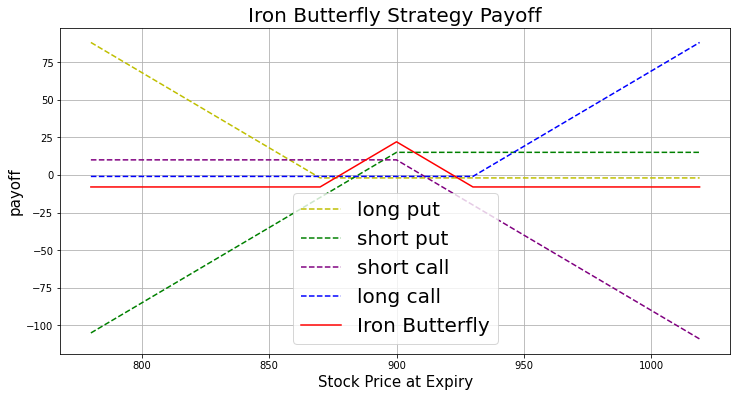

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
k_atm = 900 # the strike price of ATM call & put
k_otm_put = 870 # the strike price of OTM put
k_otm_call = 930 # the strike price of OTM call
premium_otm_put = 2 # the premium of OTM put
premium_atm_put = 15 # the premium of ATM put
premium_atm_call = 10 # the premium of ATM call
premium_otm_call = 1 # the premium of OTM call
# payoff for the long put position
payoff_long_put = [max(-premium_otm_put, k_otm_put-i-premium_otm_put) for i in price]
# payoff for the short put position
payoff_short_put = [min(premium_atm_put, -(k_atm-i-premium_atm_put)) for i in price]
# payoff for the short call position
payoff_short_call = [min(premium_atm_call, -(i-k_atm-premium_atm_call)) for i in price]
# payoff for the long call position
payoff_long_call = [max(-premium_otm_call, i-k_otm_call-premium_otm_call) for i in price]
# payoff for Iron Butterfly Strategy
payoff_iron_butterfly = np.sum([payoff_long_put,payoff_short_put,payoff_short_call,payoff_long_call], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_put, label = 'long put',linestyle='--', color='y')
plt.plot(price, payoff_short_put, label = 'short put',linestyle='--', color='g')
plt.plot(price, payoff_short_call, label = 'short call',linestyle='--', color='purple')
plt.plot(price, payoff_long_call, label = 'long call',linestyle='--', color='b')
plt.plot(price, payoff_iron_butterfly, label = 'Iron Butterfly', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Iron Butterfly Strategy Payoff',fontsize = 20)
plt.grid(True)

### **Protective collar**

Как covered call, но хотим защититься от сильного дропа. 
Имеем (или покупаем) акции, покупаем OTM put и продаем OTM call.
Ограничиваем профит от акций, ограничиваем лосс в случае сильного падения

**Когда:** хотим безопасно продать акции.


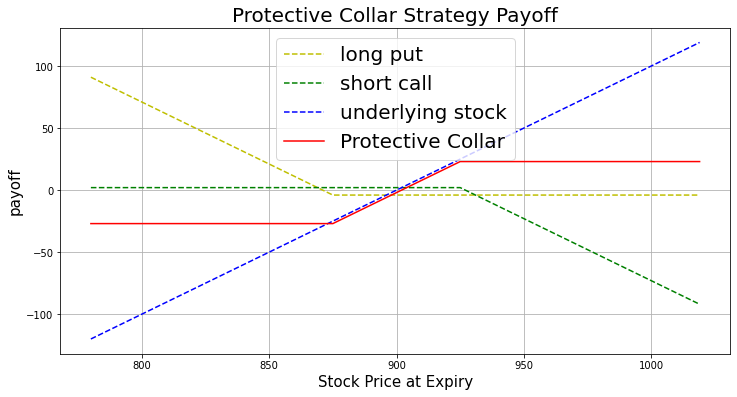

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
# assume at time 0, the price of the undelying stock is 830
k_otm_put = 875 # the strike price of OTM put
k_otm_call = 925 # the strike price of OTM call
premium_otm_put = 4 # the premium of OTM put
premium_otm_call = 2 # the premium of OTM call
# payoff for the long put position
payoff_long_put = [max(-premium_otm_put, k_otm_put-i-premium_otm_put) for i in price]
# payoff for the short call position
payoff_short_call = [min(premium_otm_call, -(i-k_otm_call-premium_otm_call)) for i in price]
# payoff for the underlying stock
payoff_stock = price - 900
# payoff for the Protective Collar Strategy
payoff_protective_collar = np.sum([payoff_long_put,payoff_short_call,payoff_stock], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_put, label = 'long put', linestyle='--', color='y')
plt.plot(price, payoff_short_call, label = 'short call', linestyle='--', color='g')
plt.plot(price, payoff_stock, label = 'underlying stock', linestyle='--', color='b')
plt.plot(price, payoff_protective_collar, label = 'Protective Collar', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Protective Collar Strategy Payoff',fontsize = 20)
plt.grid(True)

### **Married put**

Имеем (или покупаем) акции, покупаем OTM put. Немного снижаем доход, если акции пойдут вверх, но ограничиваем лосс.

**Когда:** ожидаем рост цены, но хотим немного подстраховаться


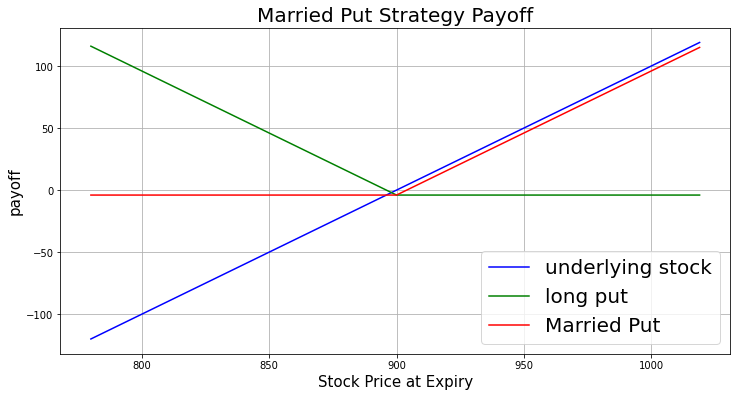

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
strike = 900 # the strike price
premium = 4 # the option premium
# the payoff of long put position
payoff_long_put = [max(-premium, - i + strike - premium) for i in price]
# the payoff of long stock postion
payoff_long_stock = [i-strike for i in price]
# the payoff of married put
payoff_married_put = np.sum([payoff_long_put, payoff_long_stock], axis=0)
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_stock, label = 'underlying stock', color='b')
plt.plot(price, payoff_long_put, label = 'long put', color='g')
plt.plot(price, payoff_married_put, label = 'Married Put', color='r')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Married Put Strategy Payoff',fontsize = 20)
plt.grid(True)
plt.show()

# Сравнение алгоритмов

### Все на одном графике

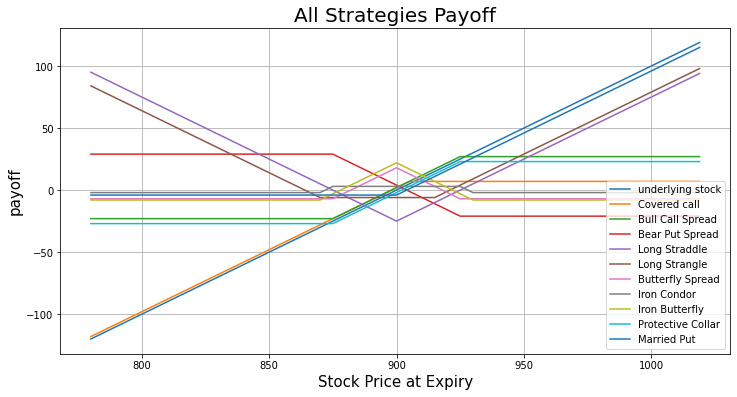

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
strike = 900 # the strike price
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_stock, label = 'underlying stock')
plt.plot(price, payoff_covered_call, label = 'Covered call')
plt.plot(price, payoff_bull_call, label = 'Bull Call Spread')
plt.plot(price, payoff_bear_put, label = 'Bear Put Spread')
plt.plot(price, payoff_long_straddle, label = 'Long Straddle')
plt.plot(price, payoff_long_strangle, label = 'Long Strangle')
plt.plot(price, payoff_butterfly_spread, label = 'Butterfly Spread')
plt.plot(price, payoff_iron_condor, label = 'Iron Condor')
plt.plot(price, payoff_iron_butterfly, label = 'Iron Butterfly')
plt.plot(price, payoff_protective_collar, label = 'Protective Collar')
plt.plot(price, payoff_married_put, label = 'Married Put')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('All Strategies Payoff',fontsize = 20)
plt.grid(True)
legend_obj = plt.legend()
legend_obj.set_draggable(True)
plt.show()

**Видим:** если цена изменилась не сильно, скорее всего лучше себя покажет iron condor butterfly или butterfly spread или iron condor (зависит от premium и страйков); 

если цена растет, то лучше работает married put или bull call spread или protective collar; 

если цена падает, лучше работает long straddle/strangle или bear put spread.

в предположении большой волатильности лучше работают long strangle или long straddle

### Высокая волатильность: Long Straddle VS Strangle (в предположении увеличения цены)

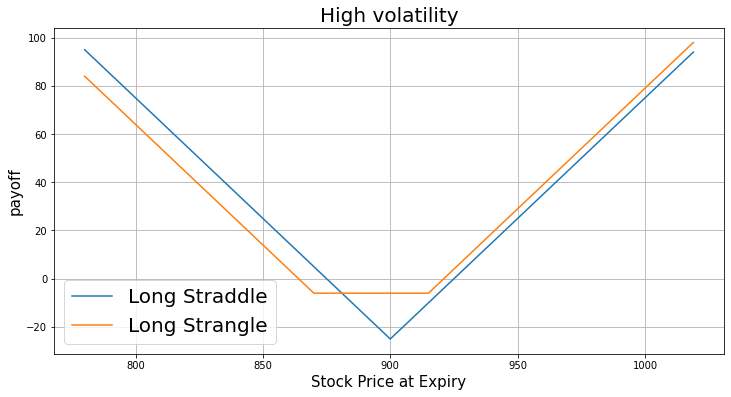

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_straddle, label = 'Long Straddle')
plt.plot(price, payoff_long_strangle, label = 'Long Strangle')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('High volatility',fontsize = 20)
plt.grid(True)
plt.show()

### Низкая волатильность: iron condor butterfly VS butterfly spread VS iron condor

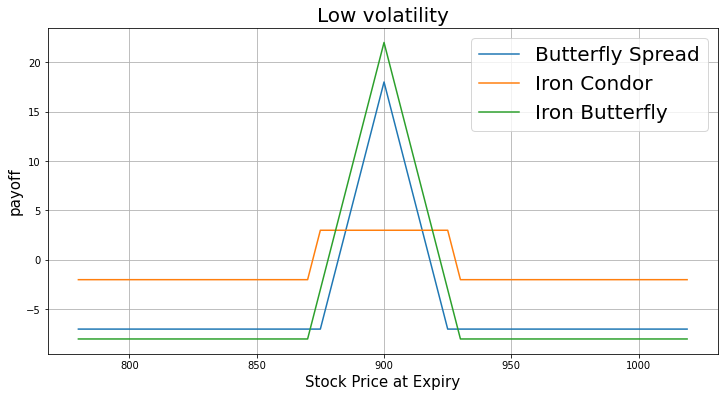

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
plt.figure(figsize=(12,6))
plt.plot(price, payoff_butterfly_spread, label = 'Butterfly Spread')
plt.plot(price, payoff_iron_condor, label = 'Iron Condor')
plt.plot(price, payoff_iron_butterfly, label = 'Iron Butterfly')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Low volatility',fontsize = 20)
plt.grid(True)
plt.show()

### Если научимся предсказывать рост: Stock VS bull call spread VS married put VS Protective Collar

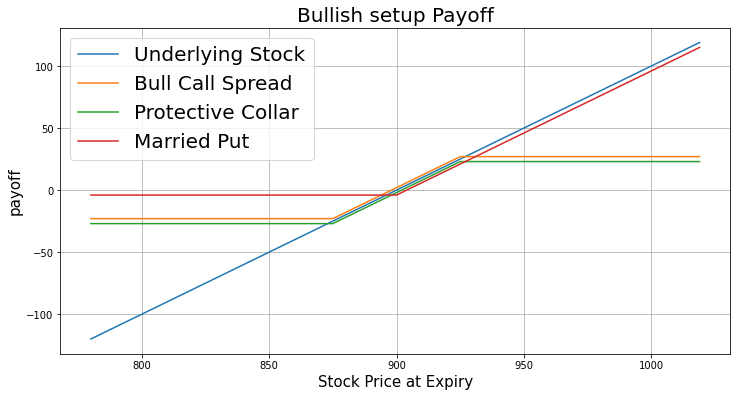

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
strike = 900 # the strike price
plt.figure(figsize=(12,6))
plt.plot(price, payoff_long_stock, label = 'Underlying Stock')
plt.plot(price, payoff_bull_call, label = 'Bull Call Spread')
plt.plot(price, payoff_protective_collar, label = 'Protective Collar')
plt.plot(price, payoff_married_put, label = 'Married Put')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Bullish setup Payoff',fontsize = 20)
plt.grid(True)
plt.show()

### Если научимся предсказывать падение: Bear Put Spread VS Long Straddle/Strangle

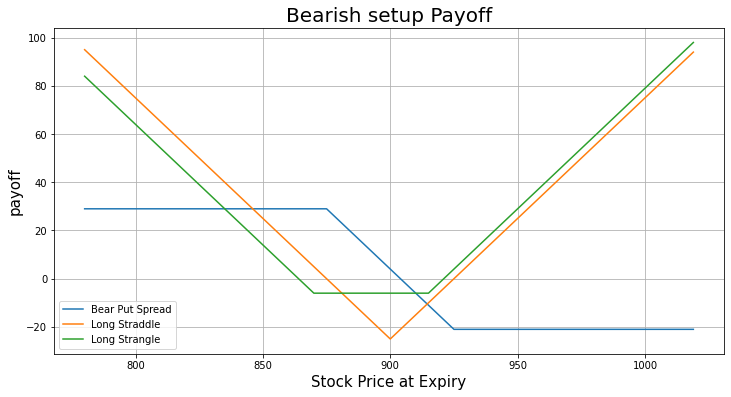

In [ ]:
price = np.arange(780,1020,1) # the stock price at expiration date
strike = 900 # the strike price
plt.figure(figsize=(12,6))
plt.plot(price, payoff_bear_put, label = 'Bear Put Spread')
plt.plot(price, payoff_long_straddle, label = 'Long Straddle')
plt.plot(price, payoff_long_strangle, label = 'Long Strangle')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Bearish setup Payoff',fontsize = 20)
plt.grid(True)
legend_obj = plt.legend()
legend_obj.set_draggable(True)
plt.show()